**HOMEWORK WEEK 12**

**NAMA : MARINA IRDAYANTI**

**NIM : 1301174319**

# Exercise

**Exercise 1**

Compare the previous example with upwind method and plot all results in one frame.

**Exercise 2**

 Please solve the transport problem
\begin{equation*}
    \rho_t + b \rho_x = 0 
\end{equation*}
and the initial density of vehicle on domain $[-1,2]$,
\begin{equation*}
    \rho(x,0)=\nu(x)=\begin{cases}
    0, & \text{ if } -1 \leq x < 0\\
    1, & \text{ if } 0 \leq x < 1\\
    0, & \text{ otherwise}
    \end{cases}
\end{equation*}

*   Use Lax-Wendroff method for $b=1$, $N=10$ and $\Delta t=0.01$. Plot solutions at times $t=0$, $t=0.1$ and $t=1$.
*   Repeat (a), with $b=-1$!



# **Exercise 1**

dx =  0.1
dt =  0.03
Courant number =  0.6


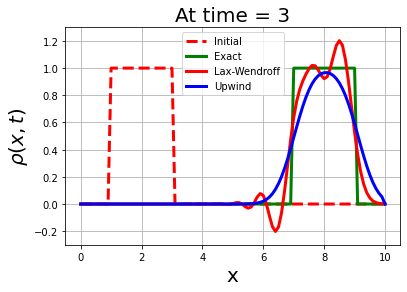

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def nu(xi):
  if  (xi >=1 and xi <= 3):
    return 1
  else :
    return 0

L1 = 0
L2 = 10
N = 101
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)

T = 101
Tfin = 3
dt = Tfin/(T-1)
print("dt = ",dt)

b=2
r=0.6 
print('Courant number = ',r)

#LAX-WENDROFF
#Initial condition
rho = []
for k in range(0,N):
  rho.append(nu(x[k]))

init = rho   # for plot purpose

time=0
while (time<=Tfin):
  time = time+dt
  rho_n = []
  rho_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho_n.append(rho[i] - (r/2)*(rho[i+1]-rho[i-1]) + (r**2/2)*(rho[i+1]-2*rho[i]+rho[i-1]))
  
  rho_n.append(0)  #Diriclet boundary right
  rho = rho_n
#Endwhile


#UPWIND
#Initial condition
rho1 = []
for k in range(0,N):
  rho1.append(nu(x[k]))

time=0
while (time<=Tfin):
  time = time+dt
  rho1_n = []
  rho1_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho1_n.append(rho1[i] - max(0,r)*(rho1[i]-rho1[i-1]) - min(0,r)*(rho1[i+1]-rho1[i]))
  
  rho1_n.append(0)  #Diriclet boundary right
  rho1 = rho1_n
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,nu(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)


plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rho1, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Lax-Wendroff', 'Upwind'],fontsize=10)
plt.show()

# **Exercise 2**

# b = 1 **&** t = 0

dx =  0.3333333333333333
dt =  0.01
Courant number =  0.03


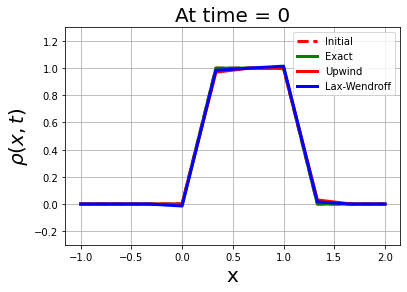

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(xi):
  if  (xi >=-1 and xi <= 0):
    return 0
  elif (xi >=0 and xi <= 1) :
    return 1
  else :
    return 0

L1 = -1
L2 = 2
N = 10
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)

Tfin = 0
dt = 0.01
print("dt = ",dt)

b=1
r=0.03 
print('Courant number = ',r)

#UPWIND
#Initial condition
rho = []
for k in range(0,N):
  rho.append(f(x[k]))

init = rho   # for plot purpose

time=0
while (time<=Tfin):
  time = time+dt
  rho_n = []
  rho_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho_n.append(rho[i] - max(0,r)*(rho[i]-rho[i-1]) - min(0,r)*(rho[i+1]-rho[i]))
  
  rho_n.append(0)  #Diriclet boundary right
  rho = rho_n
#Endwhile


#LAX-WENDROFF
#Initial condition
rho1 = []
for k in range(0,N):
  rho1.append(f(x[k]))

time=0
while (time<=Tfin):
  time = time+dt
  rho1_n = []
  rho1_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho1_n.append(rho1[i] - (r/2)*(rho1[i+1]-rho1[i-1]) + (r**2/2)*(rho1[i+1]-2*rho1[i]+rho1[i-1]))
  
  rho1_n.append(0)  #Diriclet boundary right
  rho1 = rho1_n
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,f(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)


plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rho1, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Upwind', 'Lax-Wendroff'],fontsize=10)
plt.show()

# b = 1 **&** t = 0.1

dx =  0.3333333333333333
dt =  0.01
Courant number =  0.03


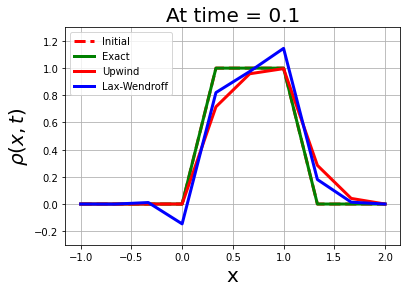

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(xi):
  if  (xi >=-1 and xi <= 0):
    return 0
  elif (xi >=0 and xi <= 1) :
    return 1
  else :
    return 0

L1 = -1
L2 = 2
N = 10
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)

Tfin = 0.1
dt = 0.01
print("dt = ",dt)

b=1
r=0.03  
print('Courant number = ',r)

#UPWIND
#Initial condition
rho = []
for k in range(0,N):
  rho.append(f(x[k]))

init = rho   # for plot purpose

time=0
while (time<=Tfin):
  time = time+dt
  rho_n = []
  rho_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho_n.append(rho[i] - max(0,r)*(rho[i]-rho[i-1]) - min(0,r)*(rho[i+1]-rho[i]))
  
  rho_n.append(0)  #Diriclet boundary right
  rho = rho_n
#Endwhile


#LAX-WENDROFF
#Initial condition
rho1 = []
for k in range(0,N):
  rho1.append(f(x[k]))

time=0
while (time<=Tfin):
  time = time+dt
  rho1_n = []
  rho1_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho1_n.append(rho1[i] - (r/2)*(rho1[i+1]-rho1[i-1]) + (r**2/2)*(rho1[i+1]-2*rho1[i]+rho1[i-1]))
  
  rho1_n.append(0)  #Diriclet boundary right
  rho1 = rho1_n
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,f(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)


plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rho1, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Upwind', 'Lax-Wendroff'],fontsize=10)
plt.show()

# b = 1 **&** t = 1

dx =  0.3333333333333333
dt =  0.01
Courant number =  0.03


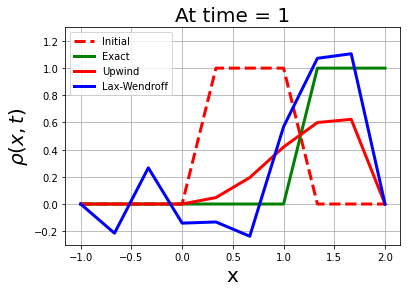

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(xi):
  if  (xi >=-1 and xi <= 0):
    return 0
  elif (xi >=0 and xi <= 1) :
    return 1
  else :
    return 0

L1 = -1
L2 = 2
N = 10
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)

Tfin = 1
dt = 0.01
print("dt = ",dt)

b=1
r=0.03  
print('Courant number = ',r)

#UPWIND
#Initial condition
rho = []
for k in range(0,N):
  rho.append(f(x[k]))

init = rho   # for plot purpose

time=0
while (time<=Tfin):
  time = time+dt
  rho_n = []
  rho_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho_n.append(rho[i] - max(0,r)*(rho[i]-rho[i-1]) - min(0,r)*(rho[i+1]-rho[i]))
  
  rho_n.append(0)  #Diriclet boundary right
  rho = rho_n
#Endwhile


#LAX-WENDROFF
#Initial condition
rho1 = []
for k in range(0,N):
  rho1.append(f(x[k]))

time=0
while (time<=Tfin):
  time = time+dt
  rho1_n = []
  rho1_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho1_n.append(rho1[i] - (r/2)*(rho1[i+1]-rho1[i-1]) + (r**2/2)*(rho1[i+1]-2*rho1[i]+rho1[i-1]))
  
  rho1_n.append(0)  #Diriclet boundary right
  rho1 = rho1_n
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,f(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)


plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rho1, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Upwind', 'Lax-Wendroff'],fontsize=10)
plt.show()

# b = -1 **&** t = 0

dx =  0.3333333333333333
dt =  0.01
Courant number =  0.03


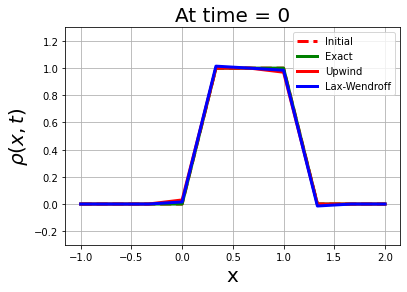

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(xi):
  if  (xi >=-1 and xi <= 0):
    return 0
  elif (xi >=0 and xi <= 1) :
    return 1
  else :
    return 0

L1 = -1
L2 = 2
N = 10
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)

Tfin = 0
dt = 0.01
print("dt = ",dt)

b=-1
r=-0.03  
print('Courant number = ',np.abs(r))

#UPWIND
#Initial condition
rho = []
for k in range(0,N):
  rho.append(f(x[k]))

init = rho   # for plot purpose

time=0
while (time<=Tfin):
  time = time+dt
  rho_n = []
  rho_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho_n.append(rho[i] - max(0,r)*(rho[i]-rho[i-1]) - min(0,r)*(rho[i+1]-rho[i]))
  
  rho_n.append(0)  #Diriclet boundary right
  rho = rho_n
#Endwhile


#LAX-WENDROFF
#Initial condition
rho1 = []
for k in range(0,N):
  rho1.append(f(x[k]))

time=0
while (time<=Tfin):
  time = time+dt
  rho1_n = []
  rho1_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho1_n.append(rho1[i] - (r/2)*(rho1[i+1]-rho1[i-1]) + (r**2/2)*(rho1[i+1]-2*rho1[i]+rho1[i-1]))
  
  rho1_n.append(0)  #Diriclet boundary right
  rho1 = rho1_n
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,f(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)


plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rho1, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Upwind', 'Lax-Wendroff'],fontsize=10)
plt.show()

# b = -1 **&** t = 0.1

dx =  0.3333333333333333
dt =  0.01
Courant number =  0.03


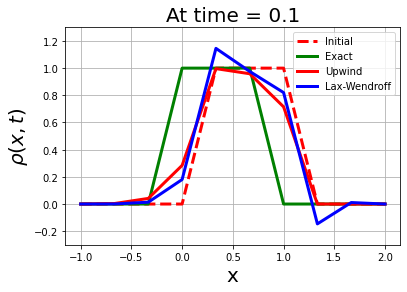

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(xi):
  if  (xi >=-1 and xi <= 0):
    return 0
  elif (xi >=0 and xi <= 1) :
    return 1
  else :
    return 0

L1 = -1
L2 = 2
N = 10
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)

Tfin = 0.1
dt = 0.01
print("dt = ",dt)

b=-1
r=-0.03   
print('Courant number = ',np.abs(r))

#UPWIND
#Initial condition
rho = []
for k in range(0,N):
  rho.append(f(x[k]))

init = rho   # for plot purpose

time=0
while (time<=Tfin):
  time = time+dt
  rho_n = []
  rho_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho_n.append(rho[i] - max(0,r)*(rho[i]-rho[i-1]) - min(0,r)*(rho[i+1]-rho[i]))
  
  rho_n.append(0)  #Diriclet boundary right
  rho = rho_n
#Endwhile


#LAX-WENDROFF
#Initial condition
rho1 = []
for k in range(0,N):
  rho1.append(f(x[k]))

time=0
while (time<=Tfin):
  time = time+dt
  rho1_n = []
  rho1_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho1_n.append(rho1[i] - (r/2)*(rho1[i+1]-rho1[i-1]) + (r**2/2)*(rho1[i+1]-2*rho1[i]+rho1[i-1]))
  
  rho1_n.append(0)  #Diriclet boundary right
  rho1 = rho1_n
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,f(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)


plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rho1, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Upwind', 'Lax-Wendroff'],fontsize=10)
plt.show()

# b = -1 **&** t = 1

dx =  0.3333333333333333
dt =  0.01
Courant number =  0.03


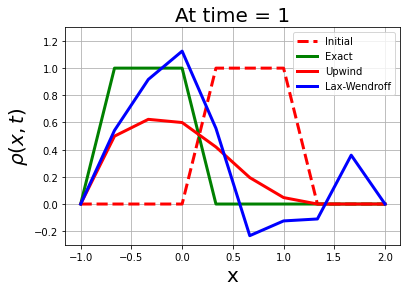

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(xi):
  if  (xi >=-1 and xi <= 0):
    return 0
  elif (xi >=0 and xi <= 1) :
    return 1
  else :
    return 0

L1 = -1
L2 = 2
N = 10
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)

Tfin = 1
dt = 0.01
print("dt = ",dt)

b=-1
r=-0.03  
print('Courant number = ',np.abs(r))

#UPWIND
#Initial condition
rho = []
for k in range(0,N):
  rho.append(f(x[k]))

init = rho   # for plot purpose

time=0
while (time<=Tfin):
  time = time+dt
  rho_n = []
  rho_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho_n.append(rho[i] - max(0,r)*(rho[i]-rho[i-1]) - min(0,r)*(rho[i+1]-rho[i]))
  
  rho_n.append(0)  #Diriclet boundary right
  rho = rho_n
#Endwhile


#LAX-WENDROFF
#Initial condition
rho1 = []
for k in range(0,N):
  rho1.append(f(x[k]))

time=0
while (time<=Tfin):
  time = time+dt
  rho1_n = []
  rho1_n.append(0)    #Diriclet boundary left
  
  for i in range (1,N-1) :
    rho1_n.append(rho1[i] - (r/2)*(rho1[i+1]-rho1[i-1]) + (r**2/2)*(rho1[i+1]-2*rho1[i]+rho1[i-1]))
  
  rho1_n.append(0)  #Diriclet boundary right
  rho1 = rho1_n
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,f(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)


plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rho1, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Upwind', 'Lax-Wendroff'],fontsize=10)
plt.show()